In [1]:
import math
import numpy as np
import pandas
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

In [2]:
sizes = [8,10,12,16,20,24]
data = []
for i in sizes:
    data.append(pandas.read_csv('L_{}_Grupo_1.dat'.format(i), sep=' ', na_values="."))

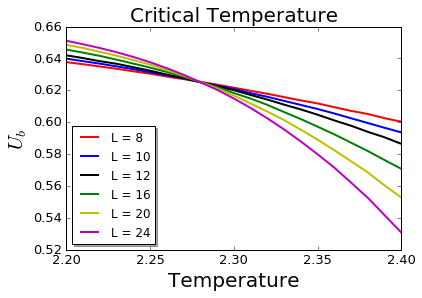

In [3]:
#plt.axes(xlim=(0, total_t),ylim=(-delta_mean_n[-1]*3, delta_mean_n[-1]*3))
colors = ['r','b','k','g','y','m']

for i in xrange(len(sizes)):
    plt.ylabel('$U_b$',fontsize=20)
    plt.xlabel('Temperature',fontsize=20)
    plt.tick_params(axis='x', labelsize=13)
    plt.tick_params(axis='y', labelsize=13)
    plt.title("Critical Temperature",fontsize=20)
    plt.plot(data[i]["T"],data[i]["Ub"], color=colors[i], linewidth=2.0,label="L = {}".format(sizes[i])) # if mean is conserved the plot should be zero
    plt.legend(loc='lower left', shadow=True)
plt.show()

In [4]:
intersection_t = np.isclose(data[0]["Ub"], data[1]["Ub"], atol=0.0004)

intersection = []
for index,truth in enumerate(intersection_t):
    if truth :
        intersection.append(index)
        intersection.append(data[0]["T"][index])

In [5]:
print intersection

[8, 2.2799999999999998]


In [6]:
dev_T_c = []

for i in xrange(len(sizes)):
    dev_T_c.append(-(np.diff(data[i]["Ub"])/np.diff(data[i]["T"]))[intersection[0]])


In [7]:
def func(x, a, b):
    return a*x**b
popt, pcov =curve_fit(func, sizes, dev_T_c)
nu = 1./ popt[1]
print popt
print nu

[ 0.02731487  0.89636844]
1.11561267854


In [8]:
L = np.arange(6, 30, 0.1)
fun = popt[0]*L**popt[1]

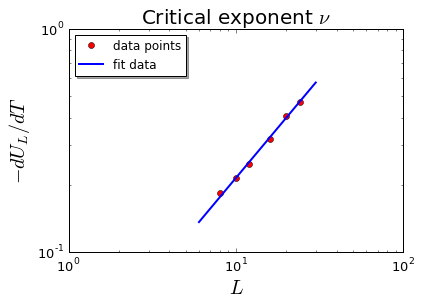

In [9]:
#plt.axes(xlim=(0.1, 0.55),ylim=(6, 26))
plt.ylabel(r'$ -dU_L/dT $',fontsize=20)
plt.xlabel(r'$L$',fontsize=20)
plt.tick_params(axis='x', labelsize=13)
plt.tick_params(axis='y', labelsize=13)
plt.title(r"Critical exponent $\nu$",fontsize=20)
plt.loglog(sizes,dev_T_c,'ro',linewidth=2.0,label = "data points")
plt.loglog(L,fun,'b',linewidth=2.0,label = "fit data")
plt.legend(loc='upper left', shadow=True,numpoints=1)

plt.show()

In [11]:
M_prom = []
for i in xrange(len(sizes)):
    M_prom.append(data[i]["Mprom"][intersection[0]]/(sizes[i]*sizes[i]))
print M_prom

[0.80604843749999999, 0.78354900000000005, 0.76631944444444444, 0.73946875000000001, 0.71836250000000001, 0.7008402777777778]


In [12]:
popt1, pcov1 =curve_fit(func, sizes, M_prom)
frac_b_nu = popt1[1]
beta = - frac_b_nu*nu
print popt1
print beta

[ 1.04891147 -0.12649292]
0.141117104546


In [13]:
L = np.arange(6, 30, 0.1)
fun1 = popt1[0]*L**popt1[1]

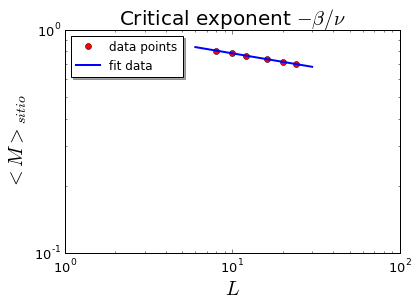

In [15]:
#plt.axes(xlim=(0.1, 0.55),ylim=(6, 26))
plt.ylabel(r'$ <M>_{sitio} $',fontsize=20)
plt.xlabel(r'$L$',fontsize=20)
plt.tick_params(axis='x', labelsize=13)
plt.tick_params(axis='y', labelsize=13)
plt.title(r"Critical exponent $- \beta / \nu$",fontsize=20)
plt.loglog(sizes,M_prom ,'ro',linewidth=2.0,label = "data points")
plt.loglog(L,fun1,'b',linewidth=2.0,label = "fit data")
plt.legend(loc='upper left', shadow=True,numpoints=1)

plt.show()

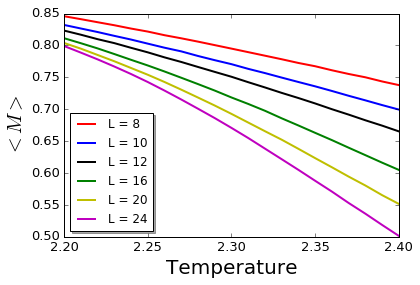

In [16]:
colors = ['r','b','k','g','y','m']

for i in xrange(len(sizes)):
    plt.ylabel(r'$ <M> $',fontsize=20)
    plt.xlabel('Temperature',fontsize=20)
    plt.tick_params(axis='x', labelsize=13)
    plt.tick_params(axis='y', labelsize=13)
    #plt.title("Critical Temperature",fontsize=20)
    plt.plot(data[i]["T"],data[i]["Mprom"]/(sizes[i]*sizes[i]), color=colors[i], linewidth=2.0,label="L = {}".format(sizes[i])) # if mean is conserved the plot should be zero
    plt.legend(loc='lower left', shadow=True)
plt.show()

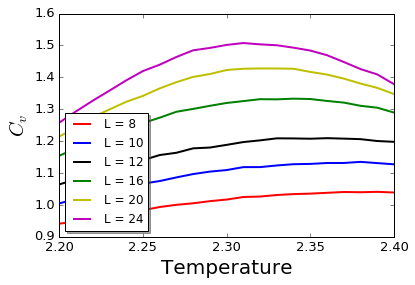

In [33]:
colors = ['r','b','k','g','y','m']

for i in xrange(len(sizes)):
    plt.ylabel(r'$ C_v $',fontsize=20)
    plt.xlabel('Temperature',fontsize=20)
    plt.tick_params(axis='x', labelsize=13)
    plt.tick_params(axis='y', labelsize=13)
    #plt.title("Critical Temperature",fontsize=20)
    plt.plot(data[i]["T"],data[i]["Cv"]/(sizes[i]*sizes[i]), color=colors[i], linewidth=2.0,label="L = {}".format(sizes[i])) # if mean is conserved the plot should be zero
    plt.legend(loc='lower left', shadow=True)
plt.show()

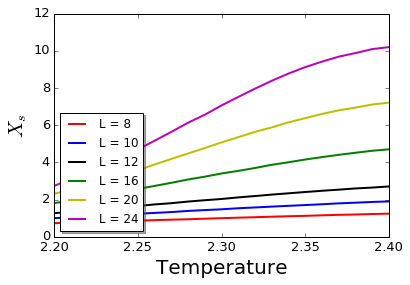

In [34]:
colors = ['r','b','k','g','y','m']

for i in xrange(len(sizes)):
    plt.ylabel(r'$ X_s $',fontsize=20)
    plt.xlabel('Temperature',fontsize=20)
    plt.tick_params(axis='x', labelsize=13)
    plt.tick_params(axis='y', labelsize=13)
    #plt.title("Critical Temperature",fontsize=20)
    plt.plot(data[i]["T"],data[i]["Xs"]/(sizes[i]*sizes[i]), color=colors[i], linewidth=2.0,label="L = {}".format(sizes[i])) # if mean is conserved the plot should be zero
    plt.legend(loc='lower left', shadow=True)
plt.show()

In [19]:
data2 = []
for i in sizes:
    data2.append(pandas.read_csv('L_{}_Grupo_2.dat'.format(i), sep=' ', na_values="."))

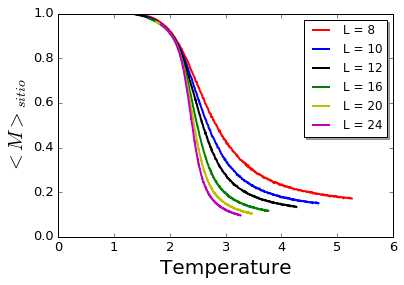

In [23]:
for i in xrange(len(sizes)):
    plt.ylabel(r'$ <M>_{sitio} $',fontsize=20)
    plt.xlabel('Temperature',fontsize=20)
    plt.tick_params(axis='x', labelsize=13)
    plt.tick_params(axis='y', labelsize=13)
    #plt.title("Critical Temperature",fontsize=20)
    plt.plot(data2[i]["T"],data2[i]["Mprom"]/(sizes[i]*sizes[i]), color=colors[i], linewidth=2.0,label="L = {}".format(sizes[i]))
    plt.legend(loc='upper right', shadow=True)
plt.show()


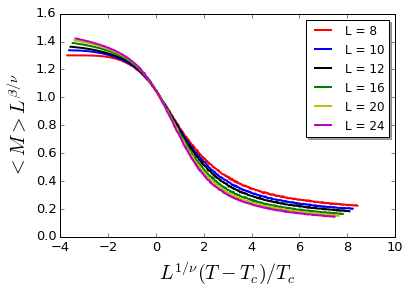

In [25]:
for i in xrange(len(sizes)):
    plt.ylabel(r'$ <M> L^{\beta / \nu}$',fontsize=20)
    plt.xlabel(r'$L^{1/\nu}(T-T_c)/T_c$',fontsize=20)
    plt.tick_params(axis='x', labelsize=13)
    plt.tick_params(axis='y', labelsize=13)
    #plt.title("Critical Temperature",fontsize=20)
    plt.plot((data2[i]["T"]-data[i]["T"][intersection[0]])*(sizes[i]**(1/nu))/(data[i]["T"][intersection[0]]),(data2[i]["Mprom"]/(sizes[i]*sizes[i]))*sizes[i]**(-frac_b_nu), color=colors[i], linewidth=2.0,label="L = {}".format(sizes[i]))
    plt.legend(loc='upper right', shadow=True)
plt.show()

In [29]:
M_2_prom = []
for i in xrange(len(sizes)):
    M_2_prom.append(data[i]["M2prom"][intersection[0]]/(sizes[i]*sizes[i]))
print M_2_prom
    
X_s = []
for i in xrange(len(sizes)):
    X_s.append(data[i]["Xs"][intersection[0]]/(sizes[i]*sizes[i]))
print X_s

[43.732812500000001, 64.5642, 88.88333333333334, 147.00742187500001, 216.63025000000002, 296.90277777777777]
[0.94341562499999998, 1.3900799999999998, 1.8945277777777778, 3.0800429687500004, 4.4789500000000002, 6.1332986111111119]


In [30]:
popt2, pcov2 =curve_fit(func, sizes, M_2_prom)
popt3, pcov3 =curve_fit(func, sizes, X_s)
frac_g_nu_0 = popt2[1]
frac_g_nu_1 = popt2[1]
gamma_0= frac_g_nu_0*nu
gamma_1= frac_g_nu_1*nu
gamma = (gamma_0+gamma_1)/2
print popt2,popt3
print gamma_0,gamma_1,gamma

[ 1.1789543   1.73991512] [ 0.02776692  1.69801529]
1.9410713716 1.9410713716 1.9410713716


In [31]:
print 2*beta+gamma
print 2*nu

2.2233055807
2.23122535708


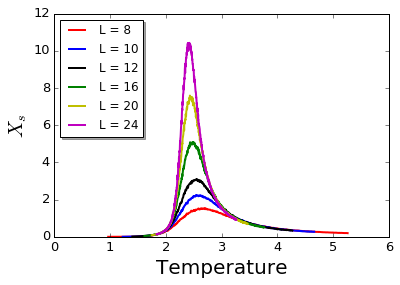

In [37]:
for i in xrange(len(sizes)):
    #plt.axes(xlim=(2, 3),ylim=(0, 7000))
    plt.ylabel(r'$ X_s $',fontsize=20)
    plt.xlabel('Temperature',fontsize=20)
    plt.tick_params(axis='x', labelsize=13)
    plt.tick_params(axis='y', labelsize=13)
    #plt.title("Critical Temperature",fontsize=20)
    plt.plot(data2[i]["T"],data2[i]["Xs"]/(sizes[i]*sizes[i]), color=colors[i], linewidth=2.0,label="L = {}".format(sizes[i]))
    plt.legend(loc='upper left', shadow=True)
plt.show()


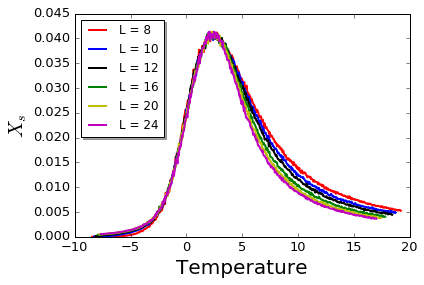

In [38]:
for i in xrange(len(sizes)):
    plt.ylabel(r'$ X_s $',fontsize=20)
    plt.xlabel('Temperature',fontsize=20)
    plt.tick_params(axis='x', labelsize=13)
    plt.tick_params(axis='y', labelsize=13)
    #plt.title("Critical Temperature",fontsize=20)
    plt.plot((data2[i]["T"]-data[i]["T"][intersection[0]])*sizes[i]**(1./nu),(data2[i]["Xs"]/(sizes[i]*sizes[i]))*sizes[i]**(-frac_g_nu_0), color=colors[i], linewidth=2.0,label="L = {}".format(sizes[i]))
    plt.legend(loc='upper left', shadow=True)
plt.show()


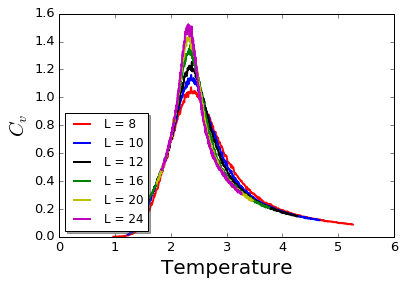

In [40]:
colors = ['r','b','k','g','y','m']

for i in xrange(len(sizes)):
    plt.ylabel(r'$ C_v $',fontsize=20)
    plt.xlabel('Temperature',fontsize=20)
    plt.tick_params(axis='x', labelsize=13)
    plt.tick_params(axis='y', labelsize=13)
    #plt.title("Critical Temperature",fontsize=20)
    plt.plot(data2[i]["T"],data2[i]["Cv"]/(sizes[i]*sizes[i]), color=colors[i], linewidth=2.0,label="L = {}".format(sizes[i])) # if mean is conserved the plot should be zero
    plt.legend(loc='lower left', shadow=True)
plt.show()